In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# for polynomial features
from sklearn.preprocessing import PolynomialFeatures

Load players data

In [3]:
data = pd.read_excel('fifa22.xlsx')
data.head()

,Name,Age,Nationality,Overall,Potential,Club,Position,Crossing,Finishing,HeadingAccuracy,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,Value
0,L. Messi,31,Argentina,94,94,FC Barcelona,RF,84.0,95.0,70.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,110.5
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,ST,84.0,94.0,89.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,77.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,LW,79.0,87.0,62.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,118.5
3,De Gea,27,Spain,91,93,Manchester United,GK,17.0,13.0,21.0,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,72.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,RCM,93.0,82.0,55.0,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,102.0


# Preprocessing

In [4]:
data.isnull().sum()

Name                0
Age                 0
Nationality         0
Overall             0
Potential           0
Club                0
Position           48
Crossing           48
Finishing          48
HeadingAccuracy    48
ShortPassing       48
Volleys            48
Dribbling          48
Curve              48
FKAccuracy         48
LongPassing        48
BallControl        48
Acceleration       48
SprintSpeed        48
Agility            48
Reactions          48
Balance            48
ShotPower          48
Jumping            48
Stamina            48
Strength           48
LongShots          48
Aggression         48
Interceptions      48
Positioning        48
Vision             48
Penalties          48
Composure          48
Marking            48
StandingTackle     48
SlidingTackle      48
GKDiving           48
GKHandling         48
GKKicking          48
GKPositioning      48
Value               0
dtype: int64

Drop the rows that contain missing values

how='any': If any value is missing (NaN) in a row, that row will be dropped.

how='all': only rows where all values are missing would be dropped.

In [5]:
data.dropna(how='any', inplace=True)

In [6]:
data.isnull().sum().sum()

0

In [64]:
X = data.iloc[:,1:40] #Features
Y = data['Value'] #Label

In [65]:
def Feature_Encoder(X, cols):
    for c in cols:
        lbl = LabelEncoder()
        lbl.fit(list(X[c].values)) # nationality, club, position (convert them to numbers 0- nclass-1)
        X[c] = lbl.transform(list(X[c].values))
    return X

In [66]:
X['Nationality'][:4]

0    Argentina
1     Portugal
2       Brazil
3        Spain
Name: Nationality, dtype: object

In [67]:
cols=('Nationality','Club','Position')

X = Feature_Encoder(X, cols);

In [68]:
X['Nationality'][:4]

0      6
1    122
2     20
3    138
Name: Nationality, dtype: int32

Split the data to training and testing sets

In [69]:
X.shape

(17907, 39)

C:\Users\MohamedMosa\AppData\Local\Temp\ipykernel_6808\3711735049.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


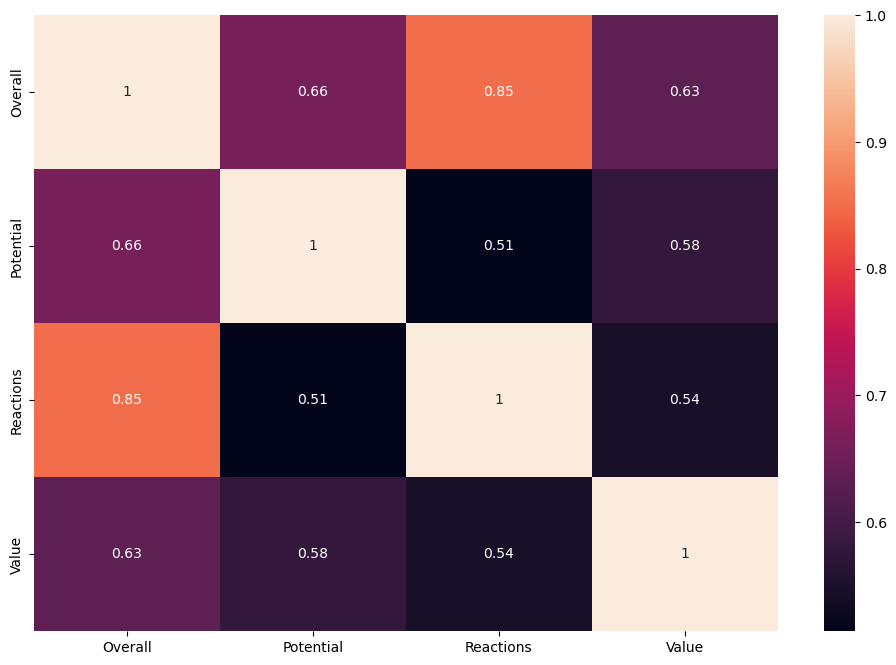

In [97]:
#Get the correlation between the features
corr = data.corr()

#Top 50% Correlation training features with the Value
top_feature = corr.index[abs(corr['Value']) > 0.5]

#Correlation plot
plt.subplots(figsize=(12, 8))
top_corr = data[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()

In [98]:
top_feature

Index(['Overall', 'Potential', 'Reactions', 'Value'], dtype='object')

In [99]:
#top_feature = top_feature.drop('Value')  # remove target itself

# Filter only those top features in X
#X = X[top_feature]

In [100]:
X.shape

(17907, 8)

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, shuffle=True) # random_state

X_train.shape, X_test.shape

((12534, 8), (5373, 8))

# Model

In [94]:
poly_features = PolynomialFeatures(degree=3)

# transforms the existing features to higher degree features.
X_train_poly = poly_features.fit_transform(X_train)

In [95]:
X_train_poly.shape

(12534, 165)

In [96]:
cls = linear_model.LinearRegression()

# fit the transformed features to Linear Regression
cls.fit(X_train_poly, y_train)

LinearRegression()

# Evaluation

In [85]:
prediction = cls.predict(poly_features.fit_transform(X_test))

In [86]:
for i in zip(prediction[:10], y_test[:10]):
    print(i)

(0.5061105590112902, 0.35)
(1.8911525574432062, 2.8)
(0.6857933019549591, 0.9)
(0.08960365905397794, 0.1)
(3.1175796013558283, 3.2)
(0.06728696909510745, 0.8)
(1.5703297739929667, 1.9)
(0.9618792172035455, 0.425)
(1.1402004531645389, 1.2)
(9.701022720191645, 9.5)


In [87]:
print('Co-efficient of linear regression',cls.coef_)
print('Intercept of linear regression model',cls.intercept_)
print('Mean Square Error', metrics.mean_squared_error(np.asarray(y_test), prediction))

Co-efficient of linear regression [ 4.52819875e-10  2.16482338e+01  1.44390316e+01 -2.55896420e-02
 -9.89274759e-01  1.14474647e+00  2.08556641e+00  2.12101776e+00
 -9.80146595e-01 -1.97889797e-01 -2.51186577e-01 -8.67832590e-03
  2.54966281e-02 -5.54074901e-02 -1.92840907e-02 -3.36115409e-02
  4.15289083e-02 -7.87949841e-02 -1.64076198e-03  8.35286154e-04
  9.99215749e-03 -3.82618915e-02 -1.91817617e-02 -3.83218835e-04
  1.38159750e-03  2.32006298e-03  2.20683855e-03  1.07244843e-02
  6.34789311e-03 -7.97990188e-03 -2.82393111e-03  8.21228193e-03
  3.83654766e-03 -7.77947269e-03  2.67371845e-03 -3.96862236e-03
  5.57970541e-03  3.43599133e-03 -4.79506194e-03 -2.14186203e-03
  3.74354383e-03 -2.29066986e-02 -1.26777209e-02  2.43091103e-03
  1.11271360e-02 -2.11996061e-05  2.70434725e-03 -2.29136922e-05
 -1.54220591e-04  6.55545440e-04  1.01522890e-04  8.80062304e-05
 -3.67546555e-04 -6.47717149e-04 -6.05641215e-05  1.92250076e-04
 -2.80920136e-04  2.55291234e-04  1.75029354e-04  9.3683

In [88]:
true_player_value = np.asarray(y_test)[0]
predicted_player_value = prediction[0]

print('True value for the first player in the test set in millions is : ' + str(true_player_value))
print('Predicted value for the first player in the test set in millions is : ' + str(predicted_player_value))

True value for the first player in the test set in millions is : 0.35
Predicted value for the first player in the test set in millions is : 0.5061105590112902
